In [1]:
import numpy as np
import os
import sys
import math
import torch
import time
import re
import random
import cv2
from matplotlib import pyplot as plt
from torchvision import transforms
from icecream import ic
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from collections import defaultdict
from functools import reduce

# 1

In [3]:
kown_links = [
    ('A', 'S1'),
    ('A', 'S2'),
    ('A', 'S3'),
    ('S1', 'S4'),
    ('S2', 'S4'),
    ('S3', 'S5'),
    ('S4', 'S6'),
    ('S5', 'S7'),
    ('S6', 'S8'),
    ('S6', 'S9'),
    ('S7', 'S10'),
    ('S9', 'S10'),
    ('S8', 'S11'),
    ('S10', 'P'),
    ('S11', 'P'),
]

In [19]:
precedure0 = defaultdict(list) # Graph
for link in kown_links:
    start, end = link   
    precedure0[start].append(end)
precedure0

defaultdict(list,
            {'A': ['S1', 'S2', 'S3'],
             'S1': ['S4'],
             'S2': ['S4'],
             'S3': ['S5'],
             'S4': ['S6'],
             'S5': ['S7'],
             'S6': ['S8', 'S9'],
             'S7': ['S10'],
             'S9': ['S10'],
             'S8': ['S11'],
             'S10': ['P'],
             'S11': ['P']})

In [23]:
precedure = precedure0.copy()
for node, links in precedure.items():
        all_nodes_have_outputs = set(precedure.keys())
        all_nodes_have_inputs = set(reduce(lambda x, y: x + y, precedure.values()))
        if node not in all_nodes_have_inputs:
            print(f"node:{node}, only output, no input")
            for link in links:
                print(f"Get link: {node}-->{link}")

node:A, only output, no input
Get link: A-->S1
Get link: A-->S2
Get link: A-->S3


In [30]:
precedure = precedure0.copy()
while precedure:
#     for node, links in precedure.items():
    all_nodes_have_outputs = set(precedure.keys())
    all_nodes_have_inputs = set(reduce(lambda x, y: x + y, precedure.values()))
    all_nodes_only_have_outputs = all_nodes_have_outputs - all_nodes_have_inputs
    for node in all_nodes_only_have_outputs:
        print(f"node:{node}, only output, no input")
        for link in precedure[node]:
            print(f"Get link: {node}-->{link}")
#     break
#         print(f"{node=}")
        del precedure[node]

node:A, only output, no input
Get link: A-->S1
Get link: A-->S2
Get link: A-->S3
node:S1, only output, no input
Get link: S1-->S4
node:S2, only output, no input
Get link: S2-->S4
node:S3, only output, no input
Get link: S3-->S5
node:S4, only output, no input
Get link: S4-->S6
node:S5, only output, no input
Get link: S5-->S7
node:S7, only output, no input
Get link: S7-->S10
node:S6, only output, no input
Get link: S6-->S8
Get link: S6-->S9
node:S8, only output, no input
Get link: S8-->S11
node:S9, only output, no input
Get link: S9-->S10
node:S11, only output, no input
Get link: S11-->P
node:S10, only output, no input
Get link: S10-->P


In [8]:
ic(precedure.values())

ic| precedure.values(): dict_values([['S1', 'S2', 'S3'], ['S4'], ['S4'], ['S5'], ['S6'], ['S7'], ['S8', 'S9'], ['S10'], ['S10'], ['S11'], ['P'], ['P']])


dict_values([['S1', 'S2', 'S3'], ['S4'], ['S4'], ['S5'], ['S6'], ['S7'], ['S8', 'S9'], ['S10'], ['S10'], ['S11'], ['P'], ['P']])

In [9]:
reduce(lambda x, y:x+y , precedure.values())

['S1',
 'S2',
 'S3',
 'S4',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9',
 'S10',
 'S10',
 'S11',
 'P',
 'P']

# 2

In [43]:
class LandMark:
    def __init__(self, name, position=None, monster=None, treasure=None):
        self.name = name
        self.position = position
        self.monster = monster
        self.treasure = treasure
    def show(self):
        print(f"I am {self.name}, I locate in {self.position}, I have monster {self.monster}, I have treasure {self.treasure}")
    def __repr__(self):
        return self.name

In [47]:
land_a = LandMark("神密谷底",(100,20),'Great',100)
land_a.show()
land_a
ic(land_a)

I am 神密谷底, I locate in (100, 20), I have monster Great, I have treasure 100


神密谷底

ic| land_a: 神密谷底


神密谷底

In [48]:
initial = LandMark('初始祭坛', (0, 20), 'None', 500)
valley = LandMark('神秘谷底', (100, 20), 'Great', 100)
island = LandMark('金银岛', (150, 150), 'Normal', 1000)
mountain = LandMark('高山', (300, 300), 'Normal', 50)
river = LandMark('河流', (350, 20), 'Good', 200)
canvey = LandMark('大峡谷', (400, 500), 'Great', 200)
ending = LandMark('终结之底', (600, 20), 'Hugu', 2000)

In [58]:
mapping0 = {
    initial: [valley, island],
    valley: [initial, mountain, river],
    mountain: [river, valley, canvey],
    island: [initial, mountain],
    river: [canvey, island],
    canvey: [ending]
}

In [36]:
import networkx as nx

In [50]:
ic(mapping)

ic| mapping: {初始祭坛: [神秘谷底, 金银岛],
              神秘谷底: [初始祭坛, 高山, 河流],
              河流: [大峡谷, 金银岛],
              大峡谷: [终结之底],
              高山: [河流, 神秘谷底, 大峡谷],
              金银岛: [初始祭坛, 高山]}


{初始祭坛: [神秘谷底, 金银岛],
 神秘谷底: [初始祭坛, 高山, 河流],
 高山: [河流, 神秘谷底, 大峡谷],
 金银岛: [初始祭坛, 高山],
 河流: [大峡谷, 金银岛],
 大峡谷: [终结之底]}

In [37]:
game_map = nx.Graph(mapping)

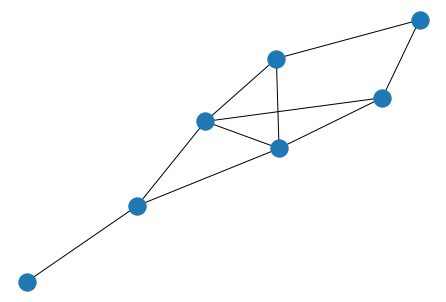

In [40]:
nx.draw(game_map)

In [72]:
mapping = mapping0.copy()
mapping
known = [initial]
visited = []
while mapping:
    print(f"{known=}")
    froniter = known.pop(0)
    if froniter in visited: continue
    print(f"{froniter=}")
    links = mapping[froniter]
    for link in links:
        print(f"I find {link}")
        known.append(link)
    visited.append(froniter)
    print(f"{visited=}")
    del mapping[froniter]

{初始祭坛: [神秘谷底, 金银岛],
 神秘谷底: [初始祭坛, 高山, 河流],
 高山: [河流, 神秘谷底, 大峡谷],
 金银岛: [初始祭坛, 高山],
 河流: [大峡谷, 金银岛],
 大峡谷: [终结之底]}

known=[初始祭坛]
froniter=初始祭坛
I find 神秘谷底
I find 金银岛
visited=[初始祭坛]
known=[神秘谷底, 金银岛]
froniter=神秘谷底
I find 初始祭坛
I find 高山
I find 河流
visited=[初始祭坛, 神秘谷底]
known=[金银岛, 初始祭坛, 高山, 河流]
froniter=金银岛
I find 初始祭坛
I find 高山
visited=[初始祭坛, 神秘谷底, 金银岛]
known=[初始祭坛, 高山, 河流, 初始祭坛, 高山]
known=[高山, 河流, 初始祭坛, 高山]
froniter=高山
I find 河流
I find 神秘谷底
I find 大峡谷
visited=[初始祭坛, 神秘谷底, 金银岛, 高山]
known=[河流, 初始祭坛, 高山, 河流, 神秘谷底, 大峡谷]
froniter=河流
I find 大峡谷
I find 金银岛
visited=[初始祭坛, 神秘谷底, 金银岛, 高山, 河流]
known=[初始祭坛, 高山, 河流, 神秘谷底, 大峡谷, 大峡谷, 金银岛]
known=[高山, 河流, 神秘谷底, 大峡谷, 大峡谷, 金银岛]
known=[河流, 神秘谷底, 大峡谷, 大峡谷, 金银岛]
known=[神秘谷底, 大峡谷, 大峡谷, 金银岛]
known=[大峡谷, 大峡谷, 金银岛]
froniter=大峡谷
I find 终结之底
visited=[初始祭坛, 神秘谷底, 金银岛, 高山, 河流, 大峡谷]


In [75]:
mapping = mapping0.copy()
mapping

def traverse(graph, start):
    known = [initial]
    visited = set()
    while graph:
#         print(f"{known=}")
        froniter = known.pop(0)
        if froniter in visited: continue
#         print(f"{froniter=}")
        links = graph[froniter]
        for link in links:
#             print(f"I find {link}")
            known.append(link)
        visited.add(froniter)
#         print(f"{visited=}")
        del graph[froniter]
    return visited

{初始祭坛: [神秘谷底, 金银岛],
 神秘谷底: [初始祭坛, 高山, 河流],
 高山: [河流, 神秘谷底, 大峡谷],
 金银岛: [初始祭坛, 高山],
 河流: [大峡谷, 金银岛],
 大峡谷: [终结之底]}

In [77]:
mapping = mapping0.copy()
all_nodes = traverse(mapping, initial)
all_nodes

{初始祭坛, 大峡谷, 河流, 神秘谷底, 金银岛, 高山}